In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn
plt.style.use('seaborn') #switch to seaborn style

C:\Users\Olga\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [38]:
######  Определим константы  #######
ambient_temperature = 300. # K, температура окружающей среды To
flame_temperature = 1000. # температура нагрева, Tl
thermal_conductivity = 10. * 0.001 ** 2 # м2 / сек

######  Определим сетку  #######
dx = 0.001 # м, шаг сетки по оси x
size = 100 # 
positions = dx*np.arange(size) # м, координаты узлов сетки по оси x

num_steps: 142
len(positions): 100


## Выбор шага step size
##### Используем явную схему - вычисляем температуру на слое по известным значениям на предудущих слоях. Схема является условно устойчивой, что приводит к тому, что при малом шаге dx мы вынуждены брать еще более мелкий шаг по времени, чтобы обеспечить устойчивость
### h < 1/2 * (dx)**2 / thermal_conductivity

In [42]:
# здесь изменяем размер шага по времени

# h = 0.050 # сек, пороговое значение, при котором метод работает
# h = 0.070 # метод становится нестабильным - функция температуры осциллирует с каждым шагом по оси x
h = 1/2*(dx**2) / thermal_conductivity
print ('h', h)
end_time = 10.0 # cек
num_steps = int(end_time / h) 
print ("num_steps:", num_steps)
print ("len(positions):", len(positions))

h 0.05
num_steps: 200
len(positions): 100


## Явная схема
#### Решается с использованием разностных аналогов краевых условий

In [59]:
def heat_conduction():

    temperatures_old = ambient_temperature*np.ones(size) # K
    ### нагрев от 40 до 50 ячейки
    for i in range(4*size//10, 5*size//10):
        temperatures_old[i] = flame_temperature
    temperatures_new = np.copy(temperatures_old) # K
    
    for step in range(num_steps):
        if step % 100 == 0:
        # записываем для отрисовки графика каждую итерацию, т.е. каждую секунду
            data.append(([pos for pos in positions], 
                          [temp for temp in temperatures_old]))
            
        # для каждого узла сетки по оси x вычисляем новое значение температуры
        for i in range(1, size - 1):
            temp = temperatures_old[i]
            temperatures_new[i] = temp + h*thermal_conductivity/dx**2 *(
                 temperatures_old[i-1] + temperatures_old[i+1] - 2.0*temp)
        
        # new <- old const (ambient), old <- new (для новой итерации) 
        temperatures_new, temperatures_old = temperatures_old, temperatures_new
    return temperatures_old

def plot_me():
    i=0
    for (pos, temp) in data:
        pylab.plot(pos, temp, label = str(i)+' сек', marker = '.', markersize = 15)
        i=i+1
    
    pylab.xlabel('Координаты, м ', fontsize=20)
    pylab.ylabel('Температура, K', fontsize=20)

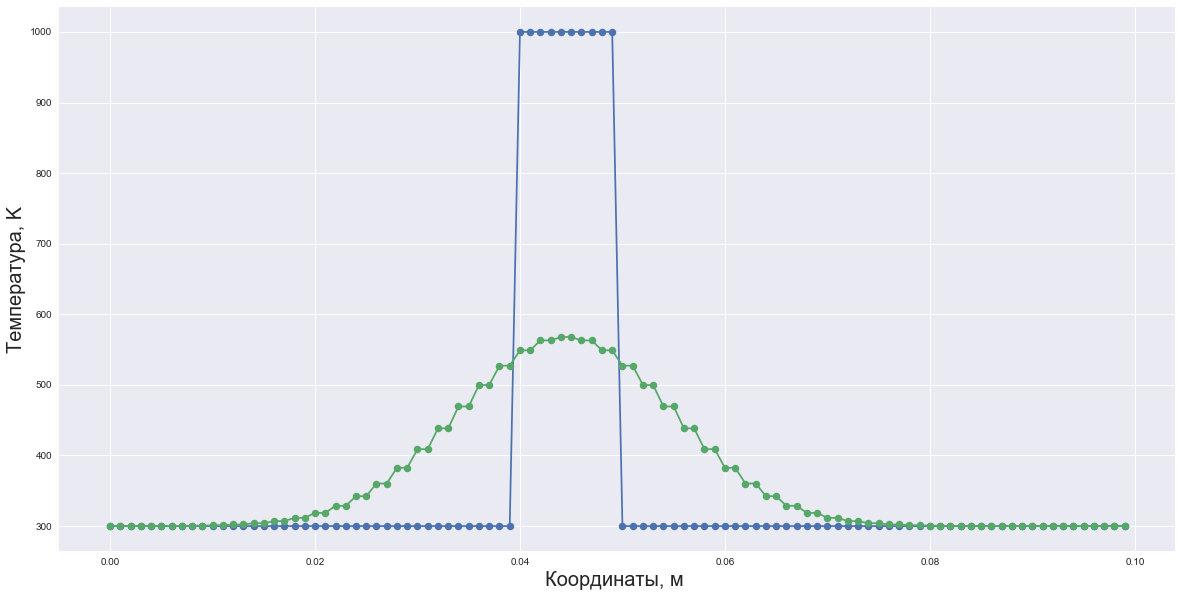

In [60]:
pylab.figure(figsize=(20,10))
data = []
temperatures = heat_conduction()
plot_me()